# Problem Statement

A marketing firm wants to launch a promotional campaign in different regions of the country. So, in order to do that, the firm needs to understand the diversity in the population demography, so that it can plan the promotional campaigns accordingly. We are provided with the population data based on different regions along with the demographic. The objective is to segregate the regions into different groups so that the marketing team can plan the resources accordingly

<b> importing the dataset

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [240]:
data = pd.read_csv('Population_Data.csv')
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


Although, all the features except "region" and "office_location_id" are numerical in nature but still python recognises them as object data type. This is because the values are separated by comma (',') as a result they are not numerical in nature. And since Sklearn only deals with numerical data-types, we have to convert the features into numeric data type by removing the commas

In [242]:
numeric = ['Indians','Foreigners','Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female','Total Population']

In [243]:
def cleaner(z):
    return z.replace(',','')

In [244]:
for i in data[numeric]:
    data[i] = data[i].apply(cleaner)
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [246]:
data[numeric] = data[numeric].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


<b>verifying the integrity of data => indians population + foreigners population = total population

In [247]:
data[['Indians','Foreigners']].sum().sum() - data['Total Population'].sum()

0

In [248]:
data[['Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female']].sum().sum() - data['Total Population'].sum()

-112859

Now this -ve result implies that Total population > no.of males + no.of females which means there are people who don't identify themselves as males and females. The total population might include groups not represented in the male and female breakdowns 

In [249]:
MF_sum = data['Indian_Male'] + data['Indian_Female'] + data["Foreigners_Male"] + data['Foreigners_Female']
data['other'] = data['Total Population'] - MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [250]:
data['Region'].nunique(),data['Office Location Id'].nunique()

(38, 38)

This implies total 38 unique values which is equal to the no. of observation. Since, all the values in these columns are unique with respect to the region and hence there is no similarity b/w any two region codes or location id. <b>[data points in a cluster should be similar to each other]

Drop 'Total Population' also since total population is already explained as the sum of 'Indians' and "Foreigners'. 

In [251]:
data1 = data.drop(columns = ['Region', 'Office Location Id','Total Population'])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


# Feature Scaling

<b>normalization

In [252]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data1.columns
data1 = norm.fit_transform(data1)

data1 = pd.DataFrame(data1, columns = columns)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


In [253]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)
pred=kmeans.predict(data1)

In [254]:
pred, len(pred)

(array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
 38)

In [255]:
pd.Series(pred).value_counts()

1    30
0     8
Name: count, dtype: int64

In [256]:
kmeans.inertia_

0.02811328589882711

In [257]:
SSE = [] 
# SSE, this emoty list will contain the inertia score whenever a clustering process is performed over the data

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data1)
    SSE.append(kmeans.inertia_)

In [258]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

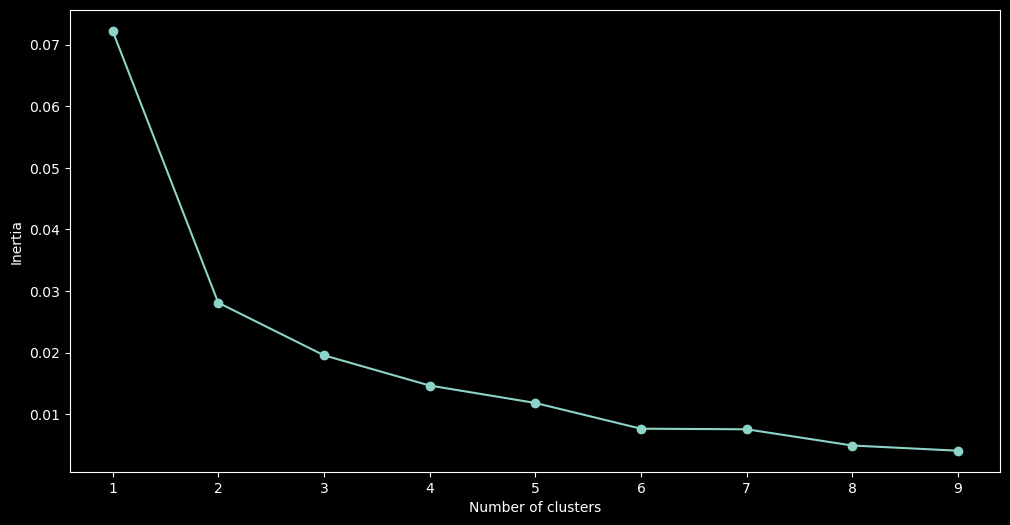

In [259]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Decrease in the value of inertia is insignificant when the no. of clusters is 3, 4 and 5. So, all three of them can be correct.

In [260]:
kmeans = KMeans(n_clusters= 3)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [261]:
data1['cluster'] = pred

let's plot two features against each other at a time to visualize it more accurately. Since, this process requires a lot of repetetive code, so, we will automate it with functions

In [262]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(data1[str_x][data1['cluster']==i])
    y.append(data1[str_y][data1['cluster']==i])
  
  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 120)
  
  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
  
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()

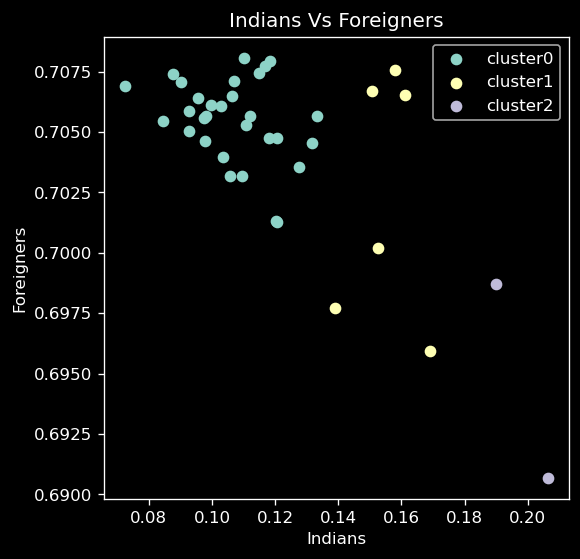

In [263]:
plot_clusters('Indians', 'Foreigners',3)

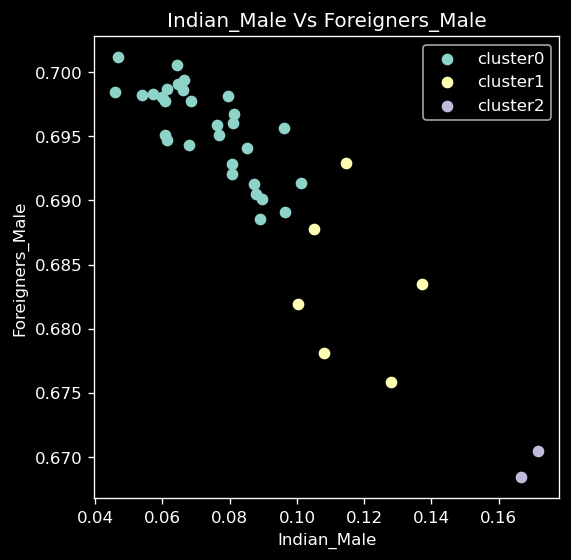

In [264]:
plot_clusters('Indian_Male', 'Foreigners_Male',3)

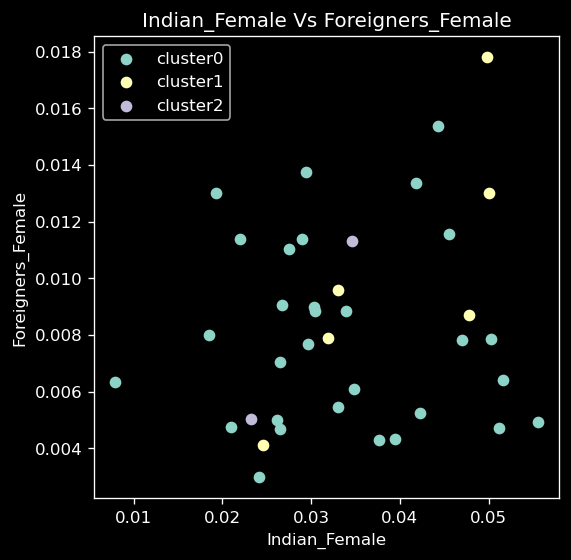

In [265]:
plot_clusters('Indian_Female', 'Foreigners_Female',3)

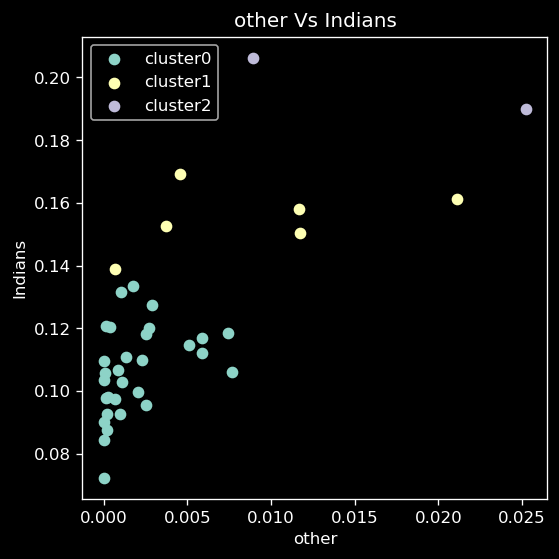

In [266]:
plot_clusters('other', 'Indians',3)